# Final Project - Team Number 2

<h4> <span style='color:darkolivegreen'>Team Members: Payal Muni, Dingyi Duan, and Roberto Cancel</span> </h4>
  
<h4> <span style='color:darkolivegreen'> Dataset: Online Shopper Intention (Dataset 3)</span> </h4>
  
<h4> <span style='color:darkolivegreen'> Origin: UCI Machine Learning Repository</span> </h4>

# Data Importing and Pre-processing 

**Import libraries and dataset from Github repository**

In [1]:
# Import libraries for future work
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE 
import statsmodels.api as sm
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pandas.api.types import is_numeric_dtype
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix as confusion_matrix2
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFECV


sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
warnings.filterwarnings('ignore')

In [2]:
# Import data from Github (online_shoppers_intention.csv)
url = 'https://raw.githubusercontent.com/rcancel3/Online-Shopper-Dataset/main/online_shoppers_intention%5B1%5D.csv'
df = pd.read_csv(url, header=0, index_col=None)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4,Returning_Visitor,True,False


<h4> <span style='color:darkolivegreen'> As seen in the code above, we first call the df.head() function to ensure that our data has imported into Pyhon correctly. We used the Panda's function: pd.read_csv(), to read our CSV file from our Github repository. </span> </h4>

<h4> <span style='color:darkolivegreen'> Now that we have confirmed that the data imported properly, we will check the dimensions of our DataFrame to look at it's size and shape (number of rows, number of columns) </span> </h4>


**Describe characteristics such as dimensions**

In [3]:
# dataframe.size
size = df.size
  
# dataframe.shape
shape = df.shape
  
# printing size and shape
print("Size:", size,"Shape:", shape)

Size: 221940 Shape: (12330, 18)


**Addressing Missing Data**  
***Step 1: Identify Missing Data:***

<h4> <span style='color:darkolivegreen'> While the reason for the missing data in our dataset is unclear, we must identify and address it to avoid inaccurate statistical results and possible bias in our model.</span> </h4>

<h4> <span style='color:darkolivegreen'> First, we will use the isnull().sum() function to counts how many rows of missing data exist for each column.</span> </h4>

In [4]:
# Count missing data per variable
df.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

***Step 2: Subset Missing Data***

In [5]:
# Pull the subset with all missing data
df_null = df.loc[df.isnull().any(axis=1)]
# Verify all Null data was pulled
df_null.isnull().sum()

Administrative               0
Administrative_Duration      0
Informational              128
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration      0
BounceRates                  0
ExitRates                    0
PageValues                 135
SpecialDay                   0
Month                        0
OperatingSystems           123
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

***Step 3: Determine Extent/Proportion of Missing Data***

In [6]:
# Confirm the number of True Revenue's with missing data is not large
df_null['Revenue'].value_counts().div(df['Revenue'].value_counts())

False    0.031184
True     0.029874
Name: Revenue, dtype: float64

<h4> <span style='color:darkolivegreen'> 
Since missing data is evenly distributed across revenue types, we decided that dropping the observations with NULLs was the most efficient method for handling our missing values.</span> </h4>

***Step 4: Drop observations with missing data***

<h4> <span style='color:darkolivegreen'> We used the drop.na() function to drop all missing data from each variable. To ensure all missing data was dropped, we ran print df.shape to count the rows and columns and summed missing data using the .isna().sum() functions.</span> </h4>

In [7]:
# Clean up data by dropping Nulls
df = df.dropna()

In [8]:
# Set to display all cols and rows
# Print new Shape and Confirm dropped Null's
print (df.shape)
print(df.isna().sum())

(11948, 18)
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


<h4> <span style='color:darkolivegreen'> After ensuring that we dropped all of the missing data, we created a new variable, totalPageViews, which summed views across view across all page types. We used totalPageViews to remove all rows with zero total views and no revenue. We also ran print(df.shape) to see if the data frame added totalPageValues and count the rows removed. </span> </h4>

In [9]:
# Create new column, to look for 0,0,0, 0
df['totalPageViews'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
df = df.loc[(df['totalPageViews'] != 0)]

<h4> <span style='color:darkolivegreen'> We must identify and remove outliers in our data set. To do this, we will first create histograms to evaluate the distribution (specifically skewness) of each feature to decide whether to replace outliers with the feature mean (if normally distributed) or median (if skewed distribution).</span> </h4>

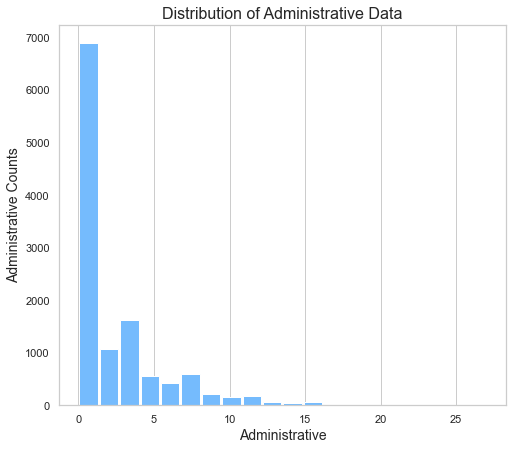

In [10]:
df['Administrative'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='xkcd:sky blue')
plt.title('Distribution of Administrative Data', fontsize = 16)
plt.xlabel('Administrative', fontsize = 14)
plt.ylabel('Administrative Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)


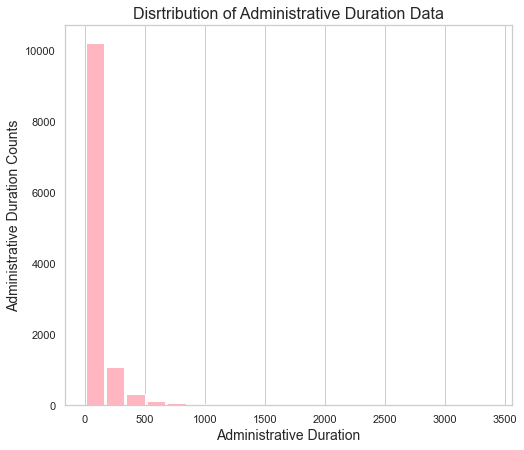

In [11]:
df['Administrative_Duration'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='LightPink')
plt.title('Disrtribution of Administrative Duration Data', fontsize = 16)
plt.xlabel('Administrative Duration', fontsize = 14)
plt.ylabel('Administrative Duration Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

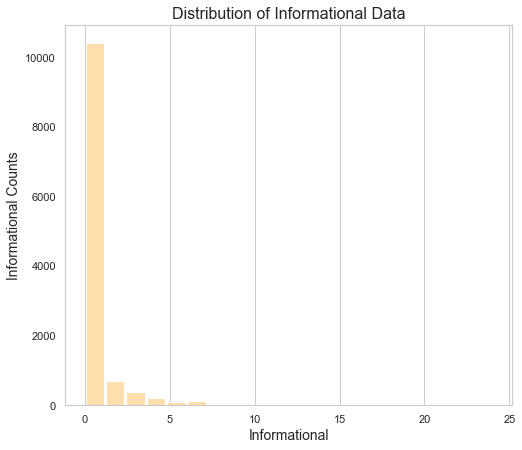

In [12]:
df['Informational'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='navajowhite')
plt.title('Distribution of Informational Data', fontsize = 16)
plt.xlabel('Informational', fontsize = 14)
plt.ylabel('Informational Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

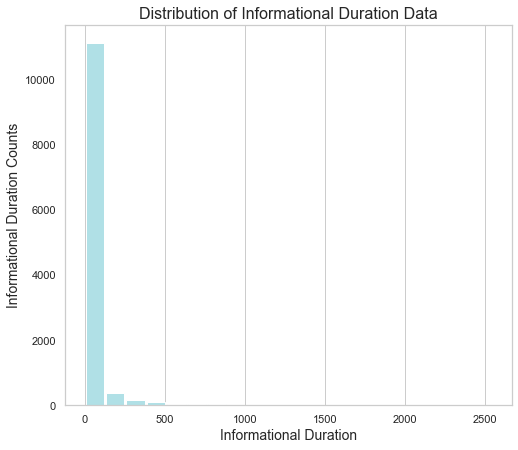

In [13]:
df['Informational_Duration'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='powderblue')
plt.title('Distribution of Informational Duration Data', fontsize = 16)
plt.xlabel('Informational Duration', fontsize = 14)
plt.ylabel('Informational Duration Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

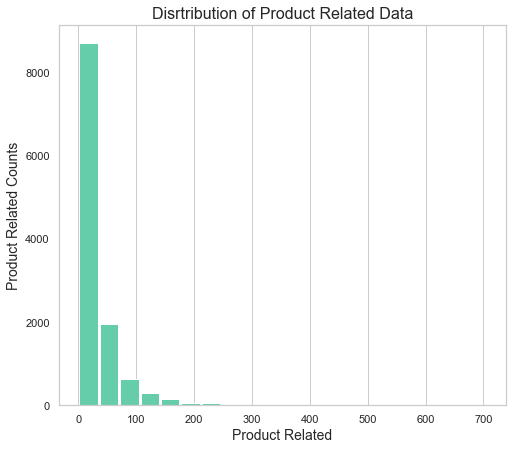

In [14]:
df['ProductRelated'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='mediumaquamarine')
plt.title('Disrtribution of Product Related Data', fontsize = 16)
plt.xlabel('Product Related', fontsize = 14)
plt.ylabel('Product Related Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

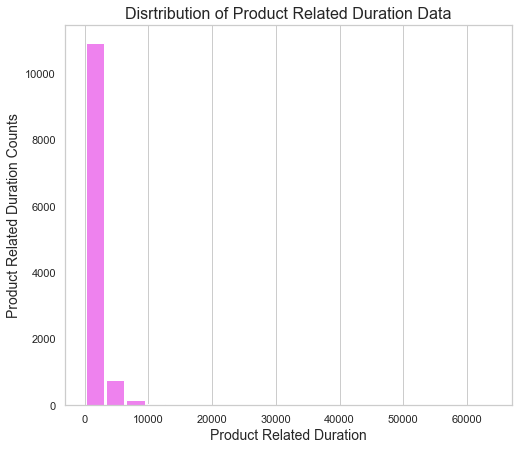

In [15]:
df['ProductRelated_Duration'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='violet')
plt.title('Disrtribution of Product Related Duration Data', fontsize = 16)
plt.xlabel('Product Related Duration', fontsize = 14)
plt.ylabel('Product Related Duration Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

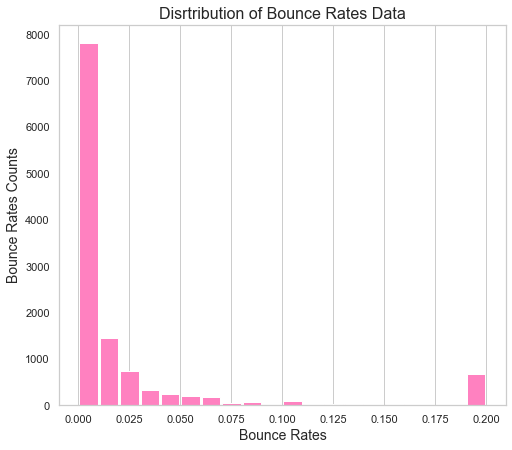

In [16]:
df['BounceRates'].plot.hist(figsize= (8,7), grid=True, bins=20, rwidth=0.9,
                   color='#FF81C0')
plt.title('Disrtribution of Bounce Rates Data', fontsize = 16)
plt.xlabel('Bounce Rates', fontsize = 14)
plt.ylabel('Bounce Rates Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

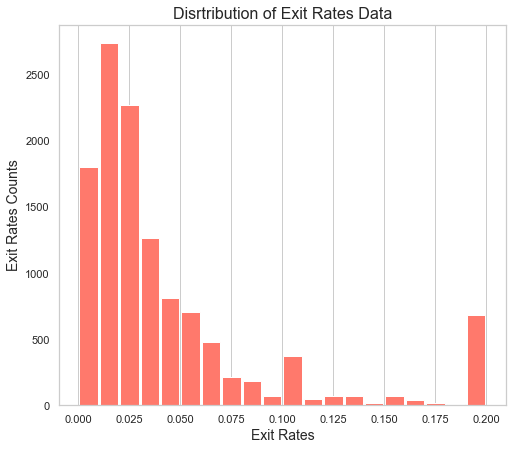

In [17]:
df['ExitRates'].plot.hist(figsize=(8,7), grid=True, bins=20, rwidth=0.9,
                   color='#FF796C')
plt.title('Disrtribution of Exit Rates Data', fontsize = 16)
plt.xlabel('Exit Rates', fontsize = 14)
plt.ylabel('Exit Rates Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

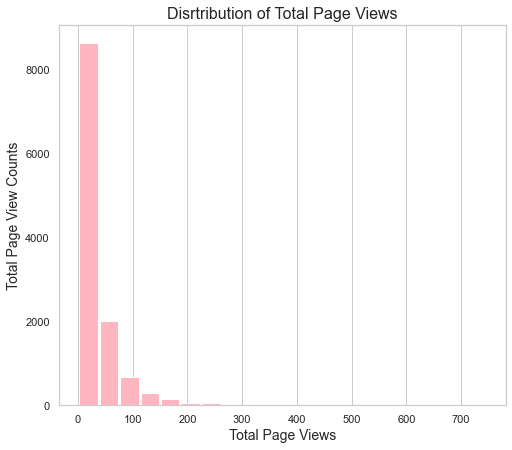

In [18]:
df['totalPageViews'].plot.hist(figsize = (8,7), grid=True, bins=20, rwidth=0.9,
                   color='LightPink')
plt.title('Disrtribution of Total Page Views', fontsize = 16)
plt.xlabel('Total Page Views', fontsize = 14)
plt.ylabel('Total Page View Counts', fontsize = 14)
plt.grid(axis='y', alpha=0.75)

Text(0, 0.5, 'Counts of Page Views')

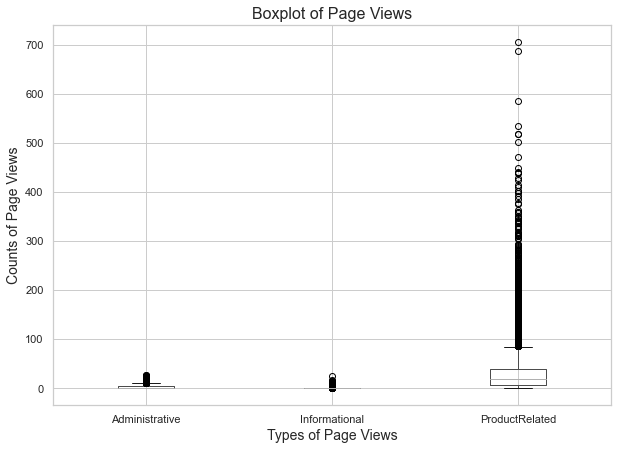

In [19]:
#checking non-categorical values for outliers
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df.boxplot(column=['Administrative', 'Informational', 'ProductRelated'])
plt.title("Boxplot of Page Views", fontsize = 16)
plt.xlabel("Types of Page Views", fontsize = 14)
plt.ylabel("Counts of Page Views", fontsize= 14 )

Text(0, 0.5, 'Time Spent on Page ')

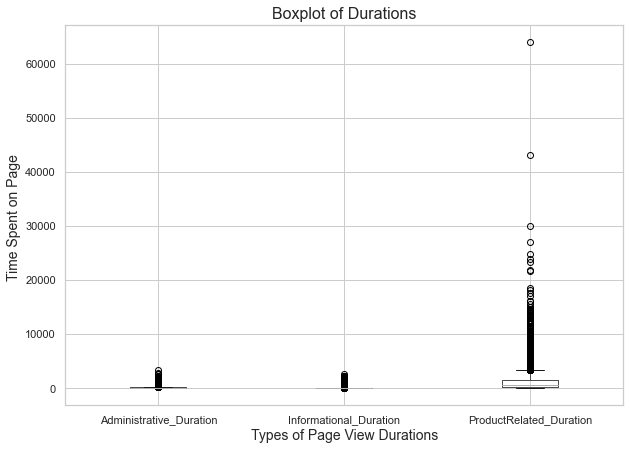

In [20]:
#checking non-categorical values for outliers
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df.boxplot(column=['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration'])
plt.title("Boxplot of Durations", fontsize = 16)
plt.xlabel("Types of Page View Durations", fontsize = 14)
plt.ylabel("Time Spent on Page ", fontsize= 14 )

Text(0, 0.5, 'Percentage')

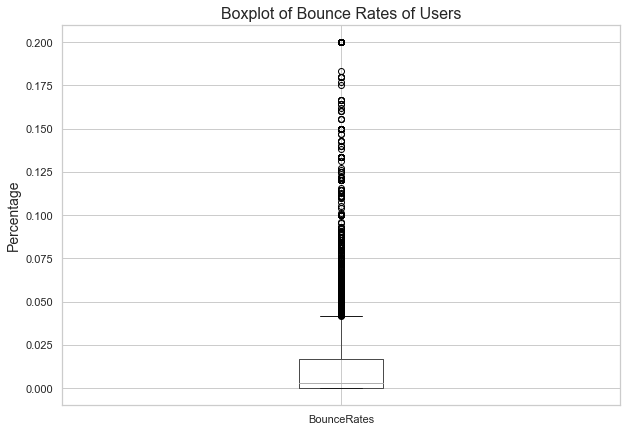

In [21]:
#checking non-categorical values for outliers
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
boxplot = df.boxplot(column=['BounceRates'])
plt.title("Boxplot of Bounce Rates of Users", fontsize = 16)
plt.ylabel("Percentage", fontsize= 14 )

Text(0, 0.5, 'Percentage')

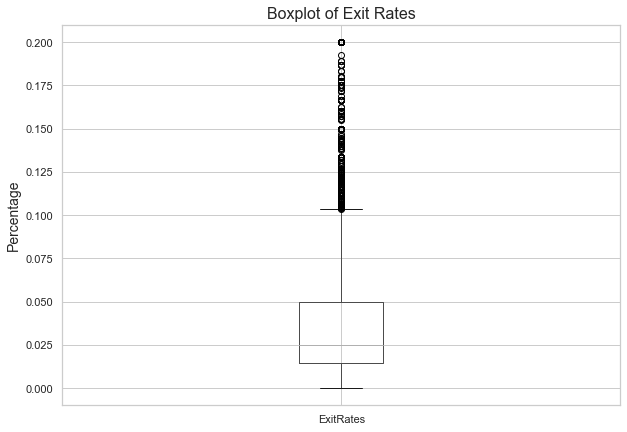

In [22]:
#Exit Rates
fig = plt.figure(figsize =(10, 7))  
# Creating axes instance
boxplot = df.boxplot(column=['ExitRates'])
plt.title("Boxplot of Exit Rates", fontsize = 16)
plt.ylabel("Percentage", fontsize= 14 )

Text(0, 0.5, 'Page Value')

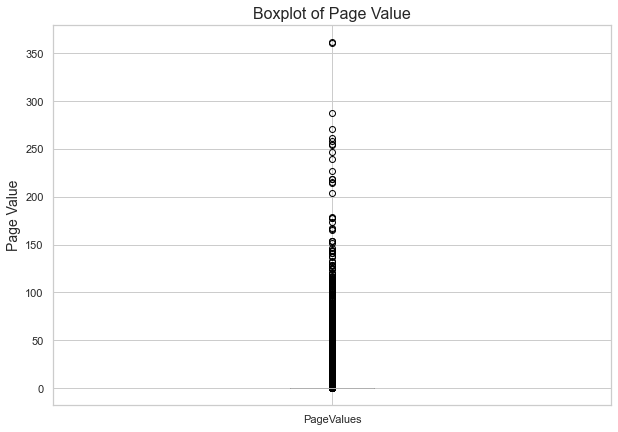

In [23]:
#PageValues 
fig = plt.figure(figsize =(10, 7))  
# Creating axes instance
boxplot = df.boxplot(column=['PageValues'])
plt.title("Boxplot of Page Value", fontsize = 16)
plt.ylabel("Page Value", fontsize= 14 )

Text(0, 0.5, 'Total Number of Pages Viewed')

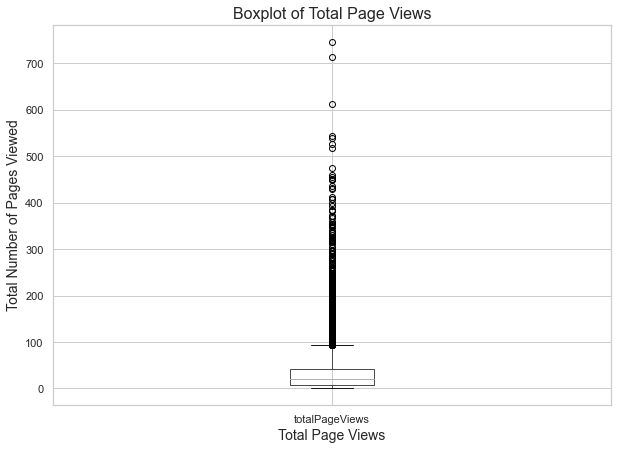

In [24]:
#Total Page Views 
fig = plt.figure(figsize =(10, 7))  
# Creating axes instance
boxplot = df.boxplot(column=['totalPageViews'])
plt.title("Boxplot of Total Page Views", fontsize = 16)
plt.xlabel("Total Page Views", fontsize = 14)
plt.ylabel("Total Number of Pages Viewed", fontsize= 14 )

<h4> <span style='color:darkolivegreen'> Our histograms of numerical variables indicated skewed distributions. Our boxplots showed numerous outliers; therefore, we subset our numerical variables in df1 and used a for loop to identify each feature’s outliers using IQR and impute with the median. </span> </h4>

**Identify Outliers & Impute with mean or median**

In [25]:
df1 = df.select_dtypes(include=np.number)
df1 = df.drop(['TrafficType','SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'Revenue', 'Month', 'VisitorType', 'Weekend', 'Informational', 'Informational_Duration', 'PageValues'], axis = 1)
df1.reset_index(inplace=True, drop=True)

for col in df1:   
    
    q3 = np.percentile(df1[col], 75)
    q1 = np.percentile(df1[col], 25)
    iqr = q3 - q1
    
    lower = q1 -(1.5 * iqr) 
    upper = q3 +(1.5 * iqr)
    
    med = df1[col].median()

    df1[col] = np.where((df1[col] >= upper), med ,df1[col]) 
    
    df1[col] = np.where((df1[col] <= lower), med ,df1[col]) 

<h4> <span style='color:darkolivegreen'> Afterward, we create df_toadd, a data frame that holds all of the variables not included in df1. Using concat, we joined the two data frames and ensured our updated df had no missing data. </span> </h4>

In [26]:
# Pull missing variables from original df
df_toadd = df[['Informational','Informational_Duration','SpecialDay','Month','OperatingSystems','Browser','Region','VisitorType','PageValues','TrafficType','Weekend', 'Revenue']]

In [27]:
#Merge df_toadd and df1
frames = [df1, df_toadd]
df = pd.concat([df1, df_toadd], axis=1, join="inner")
df.isnull().sum()

Administrative             0
Administrative_Duration    0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
totalPageViews             0
Informational              0
Informational_Duration     0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
VisitorType                0
PageValues                 0
TrafficType                0
Weekend                    0
Revenue                    0
dtype: int64

**Transform Data Type**

<h4> <span style='color:darkolivegreen'> We then used the info() function to ensure our variables were the same dimension and identify each variable’s data type.</span> </h4>

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11562 entries, 0 to 11941
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11562 non-null  float64
 1   Administrative_Duration  11562 non-null  float64
 2   ProductRelated           11562 non-null  float64
 3   ProductRelated_Duration  11562 non-null  float64
 4   BounceRates              11562 non-null  float64
 5   ExitRates                11562 non-null  float64
 6   totalPageViews           11562 non-null  float64
 7   Informational            11562 non-null  float64
 8   Informational_Duration   11562 non-null  float64
 9   SpecialDay               11562 non-null  float64
 10  Month                    11562 non-null  object 
 11  OperatingSystems         11562 non-null  float64
 12  Browser                  11562 non-null  int64  
 13  Region                   11562 non-null  int64  
 14  VisitorType           

<h4> <span style='color:darkolivegreen'> We converted our boolean variables to integers for model implementation.</span> </h4>

In [29]:
# Convert Weekend to int
df.Weekend = df.Weekend.astype(int)
# Convert boolean to binary (int) and count for successful sale
df.Revenue = df.Revenue.astype(int)

<h4> <span style='color:darkolivegreen'> After converting Revenue to an interger, we counted its classes and used a histrogram to visualize. </span> </h4>

0    9774
1    1788
Name: Revenue, dtype: int64


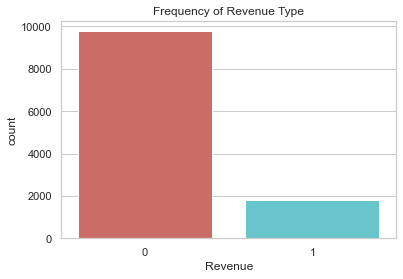

In [30]:
print(df.Revenue.value_counts())
sns.countplot(x=df['Revenue'],data=df,palette='hls').set_title("Frequency of Revenue Type")
plt.show()

<h4> <span style='color:darkolivegreen'> We created three new, more robust variables (Admin_Dur_View, Prod_Dur_View, and Info_Dur, View) using the three duration and three page variables. The new variables represent the time spent per click for each page type.</span> </h4>

In [31]:
#Create Administrative Duration per view column
df['Admin_Dur_View'] = df['Administrative_Duration'].div(df['Administrative'])
#Create ProductRelated Duration per view column
df['Prod_Dur_View'] = df['ProductRelated_Duration'].div(df['ProductRelated'])
#Create Informational Duration per view column
df['Info_Dur_View'] = df['Informational_Duration'].div(df['Informational'])

<h4> <span style='color:darkolivegreen'> To avoid the possibility of have (Page Duration)/O, we ran the fillna(0) to turn any NaN or inf values to 0. To check that no Nan or inf values remained, we utilized the isnull().sum() </span> </h4>

In [32]:
#Replace division by zero results in NAN with 0
df=df.fillna(0)
#Check for any remaining na/nulls
df.isnull().sum()

Administrative             0
Administrative_Duration    0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
totalPageViews             0
Informational              0
Informational_Duration     0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
VisitorType                0
PageValues                 0
TrafficType                0
Weekend                    0
Revenue                    0
Admin_Dur_View             0
Prod_Dur_View              0
Info_Dur_View              0
dtype: int64

**Remove redudant features**

<h4> <span style='color:darkolivegreen'> After the creation of Admin_Dur_View, Info_Dur_View, and Prod_Dur_View, the following variables become redundant: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, and totalPageViews. For that reason, we drop them from the data frame. </span> </h4>

In [33]:
df = df.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','totalPageViews'], axis = 1)

<h4> <span style='color:darkolivegreen'> We rearranged our columns so that Admin_Dur_View, Infor_Dur_View, and Prod_Dur_View were the first three columns of our table. This is so that it was easier for the team to look for data when performing further analysis. </span> </h4>

In [34]:
# Re-arrange the dataframe
cols_at_beg = ['Admin_Dur_View', 'Info_Dur_View', 'Prod_Dur_View']
df = df[[c for c in cols_at_beg if c in df]+ [c for c in df if c not in cols_at_beg]]
df.head()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,VisitorType,PageValues,TrafficType,Weekend,Revenue
0,0.0,0.0,0.000000,0.003094,0.025066,0.0,Feb,1.0,1,1,Returning_Visitor,0.0,1,0,0
1,0.0,0.0,32.000000,0.000000,0.100000,0.0,Feb,2.0,2,1,Returning_Visitor,0.0,2,0,0
2,0.0,0.0,0.000000,0.003094,0.025066,0.0,Feb,4.0,1,9,Returning_Visitor,0.0,3,0,0
3,0.0,0.0,1.333333,0.003094,0.025066,0.0,Feb,3.0,2,2,Returning_Visitor,0.0,4,0,0
4,0.0,0.0,62.750000,0.020000,0.050000,0.0,Feb,3.0,3,1,Returning_Visitor,0.0,4,1,0


**Perform Need-based Discretization:**  
  
<h4> <span style='color:darkolivegreen'>Removed Operating Systems because browsers can be dependent on operating systems (e.g.Safari only available on iOS) and browser optimization is actionable by client. </span> </h4>


In [35]:
df = df.drop(['OperatingSystems'], axis = 1)

# Data Analysis & Visualization

**Identify Variable types within data**

===========================Inputs(independent variables)=============================  
'Admin_Dur_View': numerical  
'Info_Dur_View': numerical  
'Prod_Dur_view': numerical  
'BounceRates': numerical  
'ExitRates': numerical  
'PageValues': numerical  
'Special Day': categorical  
'Month': categorical  
'Browser': categorical  
'Region': categorical  
'TrafficType': categorical  
'VisitorType': categorical   
'Weekend': boolean converted to integer  
==============================Predictor (desired target)=============================  
'Revenue': boolean converted to integer  

In [36]:
# Counts for sale/no sale in percentage
sale_count = len(df[df['Revenue']==1])
no_sale_count = len(df[df['Revenue']==0])
pct_sale_count = sale_count / (sale_count + no_sale_count)
print('Percentage of successful revenue is: ', round(pct_sale_count*100,2),'%')
pct_no_sale_count = no_sale_count / (sale_count + no_sale_count)
print('Percentage of no revenue is: ', round(pct_no_sale_count*100,2),'%')

Percentage of successful revenue is:  15.46 %
Percentage of no revenue is:  84.54 %


<h4> <span style='color:darkolivegreen'>Note: The ratio of no revenue to succesful revenue instances is ~ 85:15. Let's further explore the dataset</span> </h4>

**Provide Measures of Centrality & distribution**

In [37]:
df.mean()

Admin_Dur_View    14.303725
Info_Dur_View     14.916307
Prod_Dur_View     38.420597
BounceRates        0.005990
ExitRates          0.029412
SpecialDay         0.063432
Browser            2.349075
Region             3.140893
PageValues         5.933794
TrafficType        4.056132
Weekend            0.231361
Revenue            0.154645
dtype: float64

<h4> <span style='color:darkolivegreen'>Interpretation of means:</span> </h4>   
  
<h4> <span style='color:darkolivegreen'>We see that, as expected for an ecommerce website, visitors, on average, spent the most time on Product Related pages, followed by informational pages, and the least amount of time on Administrative pages. On average, 23% of sessions were on the weekend and 15.4% resulted in a sale.</span> </h4>

In [38]:
df.groupby('Revenue').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,TrafficType,Weekend
Revenue,,,,,,,,,,,
0,14.225289,13.398905,38.573522,0.006009,0.029453,0.070861,2.334766,3.150501,1.982632,4.056886,0.225905
1,14.732493,23.211100,37.584644,0.005889,0.029189,0.022819,2.427293,3.088367,27.532597,4.052013,0.261186


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>Successful Revenue have higher average values for: Info_Dur_View, PageValues; lower average values for Prod_Dur_View, SpecialDay; the rest of the variables have little difference.</span> </h4>

In [39]:
df.groupby('Month').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,TrafficType,Weekend,Revenue
Month,,,,,,,,,,,,
Aug,21.232079,16.823422,40.294538,0.006486,0.027475,0.000000,2.355450,3.248815,5.843886,3.507109,0.227488,0.177725
Dec,14.396003,15.229784,40.348774,0.005977,0.028192,0.000000,2.584381,3.388484,6.756185,4.066843,0.210457,0.123097
Feb,2.020121,1.355556,37.351380,0.004169,0.034689,0.231111,2.166667,2.627778,0.910149,2.783333,0.155556,0.016667
Jul,21.359726,18.434564,38.715820,0.006111,0.028368,0.000000,2.356295,3.451306,4.185711,3.672209,0.239905,0.154394
June,17.555790,7.090725,40.519328,0.005225,0.025546,0.000000,2.328520,3.122744,3.512855,4.231047,0.166065,0.097473
Mar,12.111063,15.033477,38.048085,0.004793,0.029643,0.000000,2.290270,3.031892,4.009266,3.176216,0.248108,0.100000
May,12.622533,11.991647,37.469119,0.006598,0.031861,0.213453,2.367479,3.117865,5.469606,4.457575,0.210429,0.108917
Nov,14.026237,18.332399,38.718799,0.006078,0.028415,0.000000,2.247400,3.033432,7.402075,4.451337,0.263001,0.259287
Oct,19.513075,18.422626,39.035859,0.005977,0.026765,0.000000,2.231499,3.214421,8.684554,4.347249,0.269450,0.210626


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>As it relates to Revenue, certain months have a much higher revenue success rate than others, indicating that month is a determinant that should be considered.</span> </h4>

In [40]:
df.groupby('Browser').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Region,PageValues,TrafficType,Weekend,Revenue
Browser,,,,,,,,,,,
1,14.404301,12.022007,39.800192,0.006199,0.029358,0.053178,2.884998,5.658653,3.401643,0.286208,0.150022
2,14.336596,16.484068,38.248374,0.005949,0.029281,0.065935,3.172603,5.770341,4.282137,0.222817,0.153321
3,13.064464,11.741843,31.494910,0.006250,0.029660,0.097030,2.792079,2.684449,4.138614,0.326733,0.049505
4,12.349921,10.426278,37.227339,0.005886,0.028593,0.058686,3.286131,6.741575,3.086131,0.156204,0.173723
5,13.272753,12.407354,39.234802,0.006363,0.031689,0.068636,3.086364,8.292766,3.297727,0.200000,0.188636
6,18.271957,18.747087,36.965154,0.005867,0.032310,0.099401,2.904192,5.454062,3.766467,0.179641,0.119760
7,15.249180,14.914130,38.048085,0.006382,0.031424,0.043478,3.478261,3.674728,3.956522,0.282609,0.130435
8,14.148937,2.109756,37.809787,0.005612,0.030626,0.055285,3.373984,4.987323,6.569106,0.341463,0.162602
9,0.000000,0.000000,14.750000,0.000000,0.050000,0.000000,9.000000,0.000000,2.000000,0.000000,0.000000


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>As it relates to Revenue, Browser types range of values indicates that certain browsers are more likely to result in succesful revenue - indicating that Browser is a determinant that should be considered.</span> </h4>

In [41]:
df.groupby('TrafficType').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,Weekend,Revenue
TrafficType,,,,,,,,,,,
1,14.816317,10.869426,38.452305,0.005665,0.029449,0.042419,2.506263,3.195680,3.463016,0.209503,0.105832
2,13.326483,22.724776,39.026500,0.005956,0.028833,0.036585,2.192595,3.136778,8.470558,0.254490,0.217463
3,14.350545,9.429246,38.071128,0.006011,0.030127,0.093244,2.254771,2.956679,3.193037,0.176895,0.084580
4,14.015143,13.476790,36.644210,0.006930,0.031544,0.124615,2.295192,3.157692,7.149750,0.275000,0.157692
5,19.420835,9.977134,36.517059,0.005796,0.027875,0.044980,2.477912,2.831325,7.708445,0.244980,0.204819
6,14.189163,14.617152,38.072968,0.005582,0.028992,0.129665,2.569378,3.356459,5.271926,0.217703,0.119617
7,12.893972,16.983020,33.873375,0.005621,0.026810,0.052632,2.315789,2.605263,13.372544,0.315789,0.315789
8,11.308582,14.511467,39.188469,0.006358,0.028213,0.000000,2.123810,3.095238,10.813665,0.298413,0.285714
9,18.879613,16.735000,41.507991,0.006685,0.028554,0.000000,1.675000,2.675000,4.009486,0.950000,0.100000


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>As it relates to Revenue, Traffictypes range of values indicates that certain traffic type are more likely to result in succesful revenue - indicating that Traffictypes is a determinant that should be considered.</span> </h4>

In [42]:
df.groupby('VisitorType').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,TrafficType,Weekend,Revenue
VisitorType,,,,,,,,,,,,
New_Visitor,14.055067,8.955598,39.208115,0.006068,0.029388,0.019874,2.275472,3.284906,11.044826,3.856604,0.281132,0.252201
Other,17.692667,4.006134,40.708347,0.003779,0.025831,0.000000,8.763889,6.791667,15.744101,13.513889,0.083333,0.194444
Returning_Visitor,14.319015,15.952980,38.277479,0.005994,0.029442,0.070889,2.314242,3.091212,5.041584,4.019394,0.224444,0.138687


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>As it relates to Revenue, VisitorType range of values indicates that certain browsers are more likely to result in succesful revenue - indicating that VisitorType is a determinant that should be considered.</span> </h4>

In [43]:
df.groupby('Weekend').mean()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,TrafficType,Revenue
Weekend,,,,,,,,,,,
0,14.264724,13.837685,38.237706,0.005960,0.029498,0.065331,2.388658,3.138292,5.794718,4.059750,0.148644
1,14.433297,18.499752,39.028206,0.006089,0.029128,0.057121,2.217570,3.149533,6.395840,4.044112,0.174579


<h4> <span style='color:darkolivegreen'>Analysis: </span> </h4>   
  
<h4> <span style='color:darkolivegreen'>While Weekend shows a relatively small difference in Revenue success rates, it could be an indicator and we will allow RFE to determine it's impact.</span> </h4>

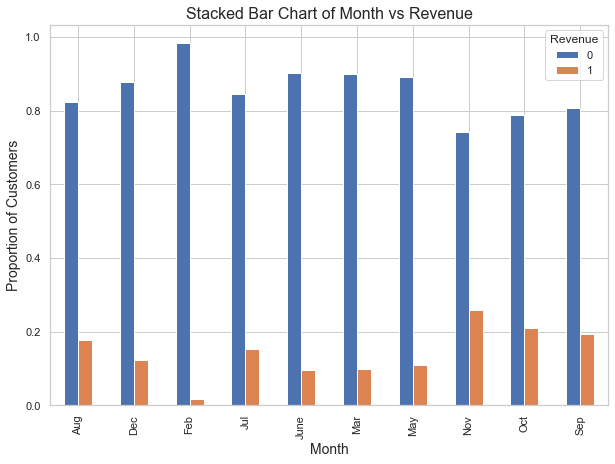

In [44]:
# ============================== Month vs Revenue ==========================
table1=pd.crosstab(df.Month,df.Revenue)
table1.div(table1.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,7))
plt.title('Stacked Bar Chart of Month vs Revenue', fontsize = 16)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Proportion of Customers', fontsize = 14)
plt.show()

<h4> <span style='color:darkolivegreen'>Month appears to be a good predictor of Revenue. </span> </h4>  

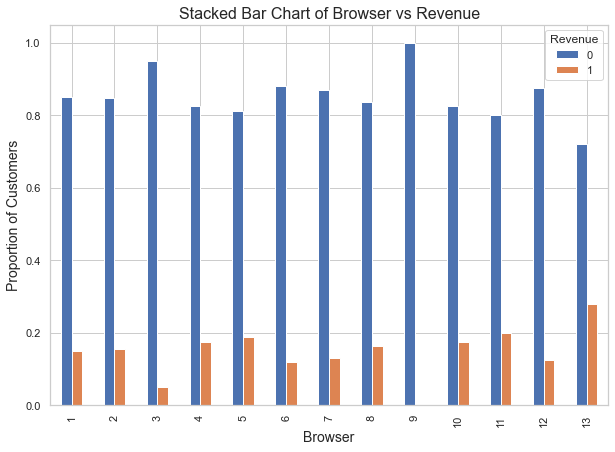

In [45]:
# ============================== Browser vs Revenue ==========================
table3=pd.crosstab(df.Browser,df.Revenue)
table3.div(table3.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,7))
plt.title('Stacked Bar Chart of Browser vs Revenue', fontsize = 16)
plt.xlabel('Browser', fontsize = 14)
plt.ylabel('Proportion of Customers', fontsize = 14)
plt.show()

<h4> <span style='color:darkolivegreen'>Browser appears to be a good predictor of Revenue. </span> </h4> 

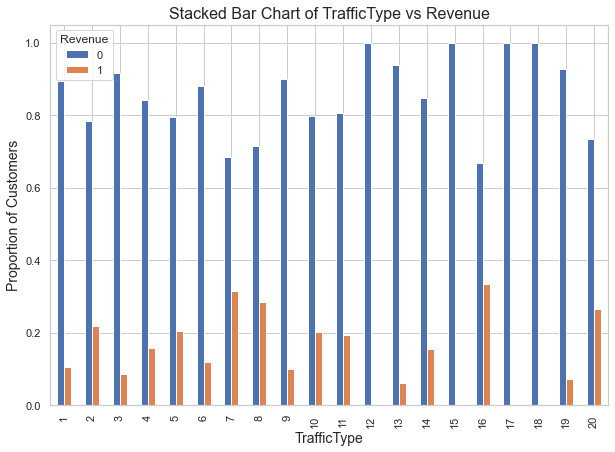

In [46]:
# ============================== TrafficType vs Revenue ==========================
table4=pd.crosstab(df.TrafficType,df.Revenue)
table4.div(table4.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,7))
plt.title('Stacked Bar Chart of TrafficType vs Revenue', fontsize = 16)
plt.xlabel('TrafficType', fontsize = 14)
plt.ylabel('Proportion of Customers', fontsize = 14)
plt.show()

<h4> <span style='color:darkolivegreen'>TrafficType appears to be a good predictor of Revenue. </span> </h4> 

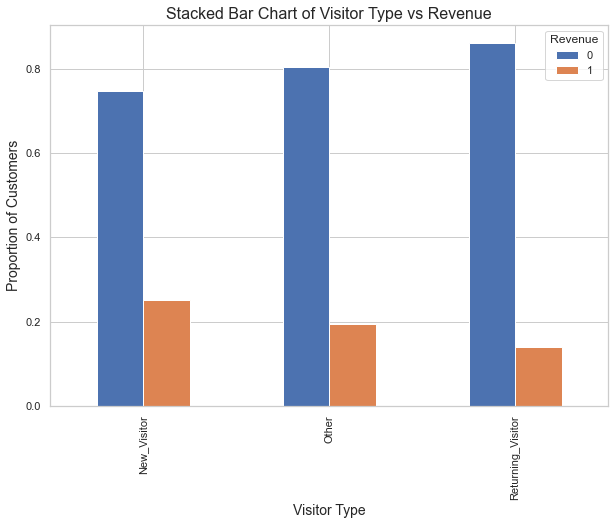

In [47]:
# ============================== VisitorType vs Revenue ==========================
table5=pd.crosstab(df.VisitorType,df.Revenue)
table5.div(table5.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,7))
plt.title('Stacked Bar Chart of Visitor Type vs Revenue', fontsize = 16)
plt.xlabel('Visitor Type', fontsize = 14)
plt.ylabel('Proportion of Customers', fontsize = 14)
plt.show()

<h4> <span style='color:darkolivegreen'>VistorType appears to be a good predictor of Revenue. </span> </h4> 

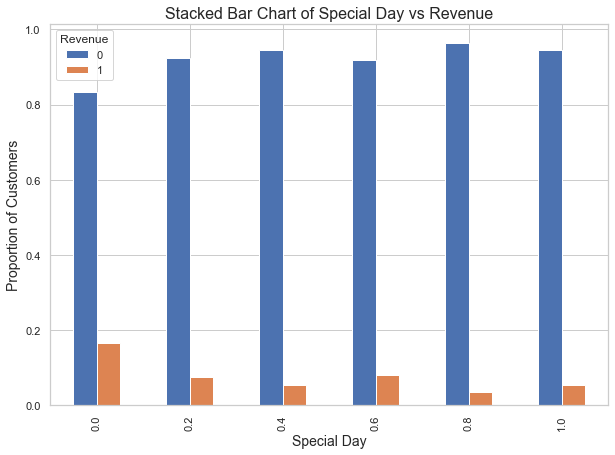

In [48]:
# ============================== Special Day vs Revenue ==========================
table5=pd.crosstab(df.SpecialDay,df.Revenue)
table5.div(table5.sum(1).astype(float), axis=0).plot(kind='bar', figsize = (10,7))
plt.title('Stacked Bar Chart of Special Day vs Revenue', fontsize = 16)
plt.xlabel('Special Day', fontsize = 14)
plt.ylabel('Proportion of Customers', fontsize = 14)
plt.show()

<h4> <span style='color:darkolivegreen'>SpecialDay appears to be a good predictor of Revenue. </span> </h4> 

Ensure no multicollinearity within variables via correlation matrix

In [49]:
df.corr()

,Admin_Dur_View,Info_Dur_View,Prod_Dur_View,BounceRates,ExitRates,SpecialDay,Browser,Region,PageValues,TrafficType,Weekend,Revenue
Admin_Dur_View,1.000000,0.000677,0.029819,-0.021784,-0.175418,-0.031402,0.008712,0.013285,0.006093,0.023394,0.002468,0.006366
Info_Dur_View,0.000677,1.000000,-0.017673,0.006272,0.004148,-0.031034,-0.006824,-0.017644,0.027637,-0.018751,0.029635,0.053478
Prod_Dur_View,0.029819,-0.017673,1.000000,0.003928,0.012735,-0.000009,-0.009523,0.014259,0.001511,0.003103,0.007033,-0.007543
BounceRates,-0.021784,0.006272,0.003928,1.000000,0.334846,0.004994,-0.014064,0.004029,-0.004983,0.004860,0.005978,-0.004769
ExitRates,-0.175418,0.004148,0.012735,0.334846,1.000000,0.030821,0.010317,-0.004951,-0.006821,-0.007101,-0.007030,-0.004305
SpecialDay,-0.031402,-0.031034,-0.000009,0.004994,0.030821,1.000000,0.004807,-0.017220,-0.066766,0.054067,-0.017166,-0.086126
Browser,0.008712,-0.006824,-0.009523,-0.014064,0.010317,0.004807,1.000000,0.088493,0.034809,0.097437,-0.042590,0.019749
Region,0.013285,-0.017644,0.014259,0.004029,-0.004951,-0.017220,0.088493,1.000000,0.011670,0.041842,0.001980,-0.009384
PageValues,0.006093,0.027637,0.001511,-0.004983,-0.006821,-0.066766,0.034809,0.011670,1.000000,0.009238,0.013574,0.494687
TrafficType,0.023394,-0.018751,0.003103,0.004860,-0.007101,0.054067,0.097437,0.041842,0.009238,1.000000,-0.001648,-0.000440


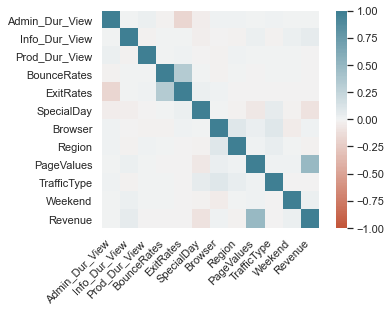

In [50]:
# Look for linear relationships in Complete Dataset
corr = df.corr(method='pearson')
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [51]:
#Determine if Special Day values are dependent on Revenue (if Special Day =0, for all Revenue=0, then drop the variable)
countSpecialDay = pd.crosstab(df['Revenue'],df['SpecialDay'])
countSpecialDay


SpecialDay,0.0,0.2,0.4,0.6,0.8,1.0
Revenue,,,,,,
0,8633,159,227,310,305,140
1,1716,13,13,27,11,8


**Remove redundant or dependent variables**

<h4> <span style='color:darkolivegreen'>From the correlation matrix we can see that "BounceRates" and "ExitRates" are moderately linear to each. Removed Bounce Rate because it is a function of Exit Rate and Exit Rate matches page views.</span> </h4> 
<h4> <span style='color:darkolivegreen'>From the correlation matrix we can see that PageValue is moderately correlated with Revenue, which means that it is not an independent variable. Removed PageValue since it is not independent.</span> </h4> 
  
<h4> <span style='color:darkolivegreen'>After analyzing our variables, we can now procceed to the next step for our model building.</span> </h4> 

In [52]:
# Drop BounceRates & PageValues
df = df.drop(['BounceRates', 'PageValues'], axis = 1)

# Data Analytics: Multi-Variable Logistic Regression (Supervised Learning)

<h4> <span style='color:darkolivegreen'>Algorithm Selection Logic:</span> </h4>  

<h4> <span style='color:darkolivegreen'>Since our goal is to predict the likelihood of Revenue, which is a boolean (binary) categorical variable, we determined the need for Supervised Learning and selected the Logistic Regression algorithm since it allows us to model a nonlinear association in a linear way with a boolean/binary target variable.</span> </h4>

**Create Dummy variables for the categorical variables using One-Hot key method selected as good predictors**

In [53]:
#Define categorical variables to be encoded using dummy variables
cat_vars=['Month','Browser','TrafficType','VisitorType','Region','SpecialDay']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list=pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [54]:
cat_vars=['Month','Browser','TrafficType','VisitorType','Region','SpecialDay']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [55]:
#Create the updated dataframe with dummy encoded categorical variables
df=df[to_keep]
#Display the updated dataframe columns
df.columns.values


array(['Admin_Dur_View', 'Info_Dur_View', 'Prod_Dur_View', 'ExitRates',
       'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep', 'Browser_1', 'Browser_2', 'Browser_3',
       'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7', 'Browser_8',
       'Browser_9', 'Browser_10', 'Browser_11', 'Browser_12',
       'Browser_13', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13',
       'TrafficType_14', 'TrafficType_15', 'TrafficType_16',
       'TrafficType_17', 'TrafficType_18', 'TrafficType_19',
       'TrafficType_20', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 

**Define X and y features and create train and test sets**

In [56]:
# Define X and y features
X = df.loc[:, df.columns != 'Revenue']
y = df.loc[:, df.columns == 'Revenue']

# breakdown train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)
columns = X_train.columns

<h4> <span style='color:darkolivegreen'>Train and Test Ratio logic:</span> </h4> 
  
<h4> <span style='color:darkolivegreen'> We then created Train and Test sets using Sklearn’s train_test_split function and set our test size to 20% since we had 11,948 observations.</span> </h4>


**Scale the predictor variables for smoother machine learning***

In [57]:
# Scaling helps the Logistic Regression better handle our mix of continuous and categorical variables with wide ranges
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train2 = pd.DataFrame(scaler.fit_transform(X_train))
X_test2 = pd.DataFrame(scaler.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2


<h4> <span style='color:darkolivegreen'>Scaling Explanation:</span> </h4> 

<h4> <span style='color:darkolivegreen'> Used the StandardScaler function to center (with_mean) and scale (with_std) all features to ensure magnitude of the features did not result in model bias.</span> </h4>


**Deploy SMOTE to balance our unbalanced Dataset**

In [58]:
# Deploy SMOTE (Syntheic Minority Oversampling Technique) to synthetically oversample the minority class (Revenue = True).
os = SMOTE(random_state=500)
os_df_X,os_df_y=os.fit_resample(X_train, y_train)
os_df_X = pd.DataFrame(data=os_df_X,columns=columns )
os_df_y= pd.DataFrame(data=os_df_y,columns=['Revenue'])

# Let's ensure SMOTE corrected the disproportionately low number of succesful Revenue observations/sessions
print("length of oversampled data is ",len(os_df_X))
print("Number of False Revenue in oversampled data",len(os_df_y[os_df_y['Revenue']==0]))
print("Number of True Revenue",len(os_df_y[os_df_y['Revenue']==1]))
print("Proportion of Fale Revenue data in oversampled data is ",len(os_df_y[os_df_y['Revenue']==0])/len(os_df_X))
print("Proportion of True Revenue data in oversampled data is ",len(os_df_y[os_df_y['Revenue']==1])/len(os_df_X))

length of oversampled data is  15684
Number of False Revenue in oversampled data 7842
Number of True Revenue 7842
Proportion of Fale Revenue data in oversampled data is  0.5
Proportion of True Revenue data in oversampled data is  0.5


<h4> <span style='color:darkolivegreen'> SMOTE Logic and Explanation:</span> </h4> 

<h4> <span style='color:darkolivegreen'><h4>Based on the disproportionately low number of succesful revenue observations and since there may not be sufficient patterns belonging to the minority class to adequately represent its distribution, we used the Synthetic Minority Oversampling Technique (SMOTE) algorithm, which aims to balance class distribution by randomly increasing minority class examples through replication.</span> </h4>

**Eliminate less impactful variables by Recursive Feature Elimination**

In [59]:
# LogisticRegression() parameters set to match Logit() parameters for easy rationalization of feature p-values
# max_iter increased to reduce errors, ovr = binary classification, penalty=none since RFE was used, 
# solver newton-cg to match logit() fit_intercept to force convergence at y-axis, 
logreg = LogisticRegression(max_iter=2000, multi_class='ovr', penalty='none', solver='newton-cg', fit_intercept=True, random_state=500)

# RFE to reduce features to avoid overfitting
rfe = RFE(estimator=logreg)
rfe = rfe.fit(os_df_X, os_df_y.values.ravel())

In [60]:
# Define rfeDf to pull features after RFE execution

rfesupport = rfe.support_
rfeRanking = rfe.ranking_
names = os_df_X.columns.values
rfeDf = pd.DataFrame()
rfeDf['rferanking'] = rfeRanking
rfeDf['names'] = names
rfeDf['rfesupport'] = rfesupport
rfeDf.sort_values(["rferanking"], axis=0,
                 ascending=True, inplace=True)
rfeDf = rfeDf.loc[rfeDf['rfesupport'] == True]


<h4> <span style='color:darkolivegreen'>RFE Logic and Approach:</span> </h4> 

<h4> <span style='color:darkolivegreen'>We deployed Recursive Feature Elimination (since we had 67 predictors going into the model) using the LogReg estimator.</span> </h4> 

**1st Model Implementation**

In [61]:
# Redefine X with RFE selected features
cols= rfeDf['names']
X=sm.add_constant(os_df_X[cols])
y=os_df_y['Revenue']

In [62]:
# Using Statsmodels.api Logit() for easy p-value rationalization
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()

# Move result to dataframe for later rationalization
result = result.summary().tables[1].as_html()
result = pd.read_html(result, header=0)[0]

result = result.rename(columns={'Unnamed: 0': 'Names'})

         Current function value: inf
         Iterations: 35


In [63]:
# Only select features with p-values < 0.05 and any nans
result = result.dropna()
result = result.loc[(result['P>|z|'] <= 0.05)]
result

# Store selected features
cols= result['Names']

# Redefine X with selected features
X=sm.add_constant(os_df_X[cols])
y=os_df_y['Revenue']


<h4> <span style='color:darkolivegreen'>Implementation Explanation:</span> </h4> 

<h4> <span style='color:darkolivegreen'>We kept only statistically significant features with p-values greater than .05 which left us with 22 features that were used for our 1st model iteration and fit using the Logistic Regression algorithm. </span> </h4>

**Logistic Regression Model Fitting**

In [64]:
# Resplit train and test sets with only features selected
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=500)

# Fit LogisticRegression with selected features
#logreg = LogisticRegression(max_iter=2000, multi_class='ovr', penalty='none', solver='newton-cg', fit_intercept=True, random_state=500)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='ovr', penalty='none',
                   random_state=500, solver='newton-cg')

In [65]:
# Print features and coefficient in clean format
pd.DataFrame(zip(X_train.columns, np.transpose(logreg.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,const,-0.100619
1,SpecialDay_1.0,-0.072164
2,Browser_5,0.071130
3,Browser_13,0.073066
4,TrafficType_2,0.063836
5,TrafficType_3,-0.356256
6,TrafficType_13,-0.326239
7,SpecialDay_0.8,-0.162267
8,TrafficType_6,-0.096448
9,TrafficType_1,-0.298785




<h4> <span style='color:darkolivegreen'>Coefficient Evaluation:</span> </h4>
  
<h4> <span style='color:darkolivegreen'>The constant (slope of the Logistic Regression) is -0.100619 - indicating that the overall likelihood of a sale is leans more towards Revenue = False. </span> </h4>
  
<h4> <span style='color:darkolivegreen'>Features that positively impact the likelihood of a sale (push the outcome towards Revenue = True) in descending order are: Month_Nov, SpecialDay_0.0, Info_Dur_View, Browser_13, Browser_5, Region_1, TrafficType_2, and Browser_2.</span> </h4>
  
<h4> <span style='color:darkolivegreen'>Features that negatively impact the likelihood of a sale (push the outcome towards Revenue = False) in descending order are: Region_9, ExitRates, Month_June, SpecialDay_1.0, Prod_Dur_View, Month_Dec, TrafficType_6, Browser_3, SpecialDay_0.8, Month_Feb, TrafficType_1, TrafficType_13, and TrafficType_3.</span> </h4>

**Evaluate Variance Inflation Factor (VIF) to address multicollinearity concerns**

In [66]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [67]:
num = X
calc_vif(num)

,variables,VIF
0,const,1.064283
1,SpecialDay_1.0,1.183025
2,Browser_5,1.098066
3,Browser_13,1.226478
4,TrafficType_2,1.643059
5,TrafficType_3,1.372623
6,TrafficType_13,1.176496
7,SpecialDay_0.8,1.342604
8,TrafficType_6,1.107478
9,TrafficType_1,1.439835


<h4> <span style='color:darkolivegreen'>Note: No Multicollinearity exists!</span> </h4>

In [68]:
# Check model accuracy using predicted y and X_test
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifiers on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifiers on test set: 0.64


In [69]:
# Confusion matrix to evaluate model
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 911  718]
 [ 407 1101]]


In [70]:
# Print Classification Report to review precision, recall, and f1-scores
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.56      0.62      1629
           1       0.61      0.73      0.66      1508

    accuracy                           0.64      3137
   macro avg       0.65      0.64      0.64      3137
weighted avg       0.65      0.64      0.64      3137



<h4> <span style='color:darkolivegreen'>Model Evaluation Summary at the bottom of the notebook.</span> </h4>

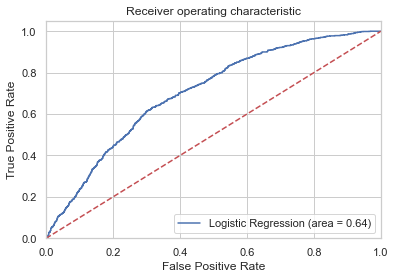

In [71]:
# Plot ROC Curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**2nd iteration of RFE and Cross-Validated Selection of the Best Number of Features**

In [72]:
# Define Logreg2 using LogisticRegression for cross-validated feature selection and matching Logit() matching parameters
logreg2 = LogisticRegression(max_iter=2000, multi_class='ovr', solver='newton-cg', fit_intercept=True, random_state=500)

# RFECV for cross-validated features selection using LogisticRegression
rfe2 = RFECV(estimator=logreg2)
rfe2 = rfe2.fit(os_df_X, os_df_y.values.ravel())

In [73]:
# Define rfeDf2 to pull features after RFECV execution

rfesupport2 = rfe2.support_
rfeRanking2 = rfe2.ranking_
names2 = os_df_X.columns.values
rfeDf2 = pd.DataFrame()
rfeDf2['rferanking2'] = rfeRanking2
rfeDf2['names2'] = names2
rfeDf2['rfesupport2'] = rfesupport2
rfeDf2.sort_values(["rferanking2"], axis=0,
                 ascending=True, inplace=True)
rfeDf2 = rfeDf2.loc[rfeDf2['rfesupport2'] == True]


<h4> <span style='color:darkolivegreen'>RFECV Logic and Explanation:</span> </h4> 

<h4> <span style='color:darkolivegreen'> We then decided to use cross-validation, which is backward selection that removes irrelevant features based on validation scores, to further reduce features to the most optimal result on the prepared data using the Logreg estimator. We kept only statistically significant features with p-values greater than .05 - leaving us with 17 features for our 2nd model iteration using the Logistic Regression algorithm. </span> </h4>

**2nd model iteration**

In [74]:
# Redefine X2 with RFECV selected features
cols3= rfeDf2['names2']
X2=sm.add_constant(os_df_X[cols3])
y=os_df_y['Revenue']

In [75]:
# Using Statsmodels.api Logit() for easy p-value rationalization
import statsmodels.api as sm2
logit_model2=sm2.Logit(y,X2)
result2=logit_model2.fit()

# Move result to dataframe for later rationalization
result2 = result2.summary().tables[1].as_html()
result2 = pd.read_html(result2, header=0)[0]

result2 = result2.rename(columns={'Unnamed: 0': 'Names'})


         Current function value: 0.619409
         Iterations: 35


In [76]:
# Only select features with p-values < 0.05 and any nans
result2 = result2.dropna()
result2 = result2.loc[(result2['P>|z|'] <= 0.05)]
result2

# Store selected features
cols4 = result2['Names']

# Redefine X2 with selected features
X2=sm2.add_constant(os_df_X[cols4])
y = os_df_y['Revenue']


<h4> <span style='color:darkolivegreen'>2nd Model Iteration Explanation and Logic:</span> </h4> 

<h4> <span style='color:darkolivegreen'> We kept only statistically significant features with p-values greater than .05 - leaving us with 17 features for our 2nd model iteration using the Logistic Regression algorithm. </span> </h4>

**2nd Logistic Regression Model Fitting**

In [77]:
# Resplit train and test sets with only features selected
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=500)

#logreg2 = LogisticRegression(max_iter=2000, multi_class='ovr', penalty='none', solver='newton-cg', fit_intercept=True, random_state=500)

# Fit LogisticRegression with selected features
logreg2.fit(X2, y)

LogisticRegression(max_iter=2000, multi_class='ovr', random_state=500,
                   solver='newton-cg')

In [78]:
# Print features and coefficient in clean format
pd.DataFrame(zip(X2_train.columns, np.transpose(logreg2.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,const,-5.218389e-07
1,Month_Mar,-2.845743e-01
2,Browser_3,-1.344427e-01
3,Browser_13,5.482572e-02
4,TrafficType_1,-2.653096e-01
5,TrafficType_3,-3.588866e-01
6,Month_Nov,2.312914e-01
7,Month_May,-1.903996e-01
8,VisitorType_New_Visitor,1.634184e-01
9,Month_Feb,-3.074085e-01


<h4> <span style='color:darkolivegreen'>Coefficient Evaluation:</span> </h4>
  
<h4> <span style='color:darkolivegreen'>The constant (slope of the Logistic Regression) is -0.0000005218389 - indicating that the overall likelihood of a sale is leans more towards Revenue = False. </span> </h4>
  
<h4> <span style='color:darkolivegreen'>Features that positively impact the likelihood of a sale (push the outcome towards Revenue = True) in descending order are: Month_Nov, VisitorType_New_Visitor, SpecialDay_0.0, Info_Dur_View, and Browser_13.</span> </h4>
  
<h4> <span style='color:darkolivegreen'>Features that negatively impact the likelihood of a sale (push the outcome towards Revenue = False) in descending order are: TrafficType_6, Month_June, Browser_3, SpecialDay_0.8, Month_May, Month_Dec, TrafficType_1, Month_Mar, Month_Feb, TrafficType_13, and TrafficType_3.</span> </h4>

**Evaluate Variance Inflation Factor (VIF) to address multicollinearity concerns**

In [79]:
def calc_vif(X2):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X2.columns
    vif["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]

    return(vif)

In [80]:
num = X2
calc_vif(num)

,variables,VIF
0,const,1.067329
1,Month_Mar,1.538745
2,Browser_3,1.004137
3,Browser_13,1.041498
4,TrafficType_1,1.156913
5,TrafficType_3,1.112501
6,Month_Nov,1.942316
7,Month_May,2.193062
8,VisitorType_New_Visitor,1.111086
9,Month_Feb,1.093395


<h4> <span style='color:darkolivegreen'>Note: No Multicollinearity exists!</span> </h4>

In [81]:
# Check model accuracy using predicted y and X_test
y2_pred = logreg2.predict(X2_test)
print('Accuracy of logistic regression classifiers on test set: {:.2f}'.format(logreg2.score(X2_test, y2_test)))

Accuracy of logistic regression classifiers on test set: 0.66


In [82]:
# Confusion Matrix to evaluate model performance
confusion_matrix2 = confusion_matrix2(y2_test, y2_pred)
print(confusion_matrix2)

[[1075  554]
 [ 513  995]]


In [83]:
# Classification Report to evaluate Precision, Recall, and f1-scores
print(classification_report(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.68      0.66      0.67      1629
           1       0.64      0.66      0.65      1508

    accuracy                           0.66      3137
   macro avg       0.66      0.66      0.66      3137
weighted avg       0.66      0.66      0.66      3137



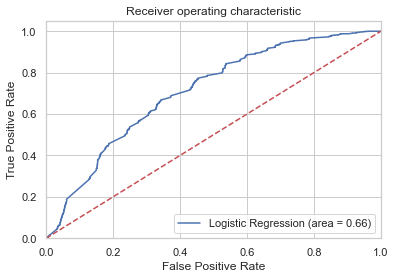

In [84]:
# ROC curve for model evaluation
logit_roc_auc = roc_auc_score(y2_test, logreg2.predict(X2_test))
fpr, tpr, thresholds = roc_curve(y2_test, logreg2.predict_proba(X2_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

<h4> <span style='color:darkolivegreen'>Decision Logic:</span> </h4>
  
<h4> <span style='color:darkolivegreen'> Since the cost of False Negatives (Sessions identified as not likely to purchase that are likely to purchase) is high (the client wouldn't deploy sales tactics to further entice the purchase or grow the basket) in our model, Recall is our primary model evaluation metric with overall accuracy (f1-score) as a secondary measure.</span> </h4>

<h4> <span style='color:darkolivegreen'>Final Model Selection:</span> </h4>
  
<h4> <span style='color:darkolivegreen'> Given the above results, Model 2 is determined as the best fit since it uses the fewest number of features, has the highest Recall (66% in Model 2 vs 64% in Model1), and the highest overall accuracy (66% in Model 2 vs 64% in Model1).</span> </h4>

Final Logistic Regression Equation

<h4> <span style='color:darkolivegreen'>ln[y/(1−y)]=-5.22e-07 + 0.231*Month_Nov + 0.163*VisitorType_New_Visitor + 0.151*SpecialDay_0.0 + 0.105*Info_Dur_View + 0.055*Browser13 - 0.108*TrafficType_6 - 0.359*TrafficType_3 - 0.321*TrafficType_13 - 0.307*Month_Feb - 0.285*Month_Mar - 0.265*TrafficType_1 - 0.230*Month_Dec - 0.19*Month_May -1.39*SpecialDay_0.8 - 0.134*Browser_3 - 0.122*Month_June + ε:</span> </h4>

**Using our Logistic Regression Equation for outcome predictions**

<h4> <span style='color:darkolivegreen'>In order to use this equation for further interpretation or predictions, input for our single numerical feature selected (Info_Dur_view) must be centered by its mean and scaled by its standard deviation. Outcome probabilities can be predicted by plugging in the appropriate values for each variable, summing the values and constant, and then calculating logistic transformation 1/(1+e) to determine the probability of a Revenue = True.</span> </h4>